In [9]:
import numpy as np
import nibabel as nib
from vox.viz import grid_view
from vox.utils import one_hot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,20)

# vox_path = '../asset/data/sa.nii.gz'
# vox_gt_path = '../asset/data/sa_gt.nii.gz'
# ED = 0
# ES = 7
vox_path = '/home/cwj/tmp/H5N0P0_sa.nii.gz'
vox_gt_path = '/home/cwj/tmp/H5N0P0_sa_gt.nii.gz'
ED = 0
ES = 8

In [10]:
def read_nii_gz(path):
    nib_vol = nib.load(path)
    data = nib_vol.get_fdata()
    affine = nib_vol.affine
    return nib_vol, data, affine

In [11]:
vox, vox_data, vox_affine = read_nii_gz(vox_path)
vox_gt, vox_gt_data, vox_gt_affine = read_nii_gz(vox_gt_path)

In [12]:
print('vox data: ', vox_data.shape)
print('vox gt data: ', vox_gt_data.shape)
vox_ed_data = vox_data[:, :, :, ED]
vox_gt_ed_data = vox_gt_data[:, :, :, ED]
print('vox ed data: ', vox_ed_data.shape)
print('vox gt ed data: ', vox_gt_ed_data.shape)

vox_es_data = vox_data[:, :, :, ES]
vox_gt_es_data = vox_gt_data[:, :, :, ES]
print('vox es data: ', vox_es_data.shape)
print('vox gt es data: ', vox_gt_es_data.shape)

vox data:  (208, 256, 11, 25)
vox gt data:  (208, 256, 11, 25)
vox ed data:  (208, 256, 11)
vox gt ed data:  (208, 256, 11)


grid out shape (512, 1248)


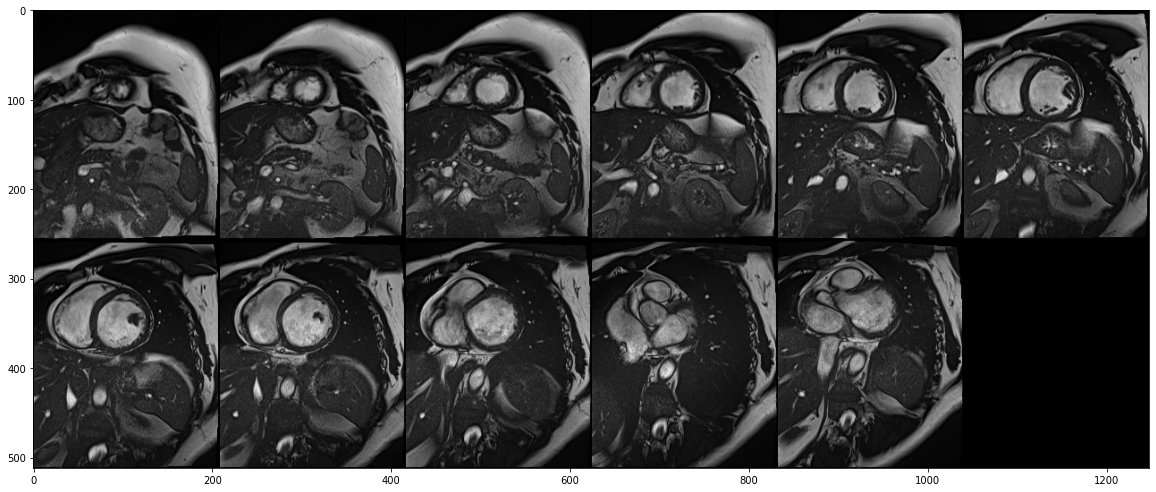

In [13]:
# grid_out = grid_view(vox_ed_data, layout=(2, 6), margin=0)
# print('grid out shape', grid_out.shape)
# plt.imshow(grid_out, cmap='gray')
# plt.show()
grid_out = grid_view(vox_es_data, layout=(2, 6), margin=0)
print('grid out shape', grid_out.shape)
plt.imshow(grid_out, cmap='gray')
plt.show()

grid out shape (527, 1283)


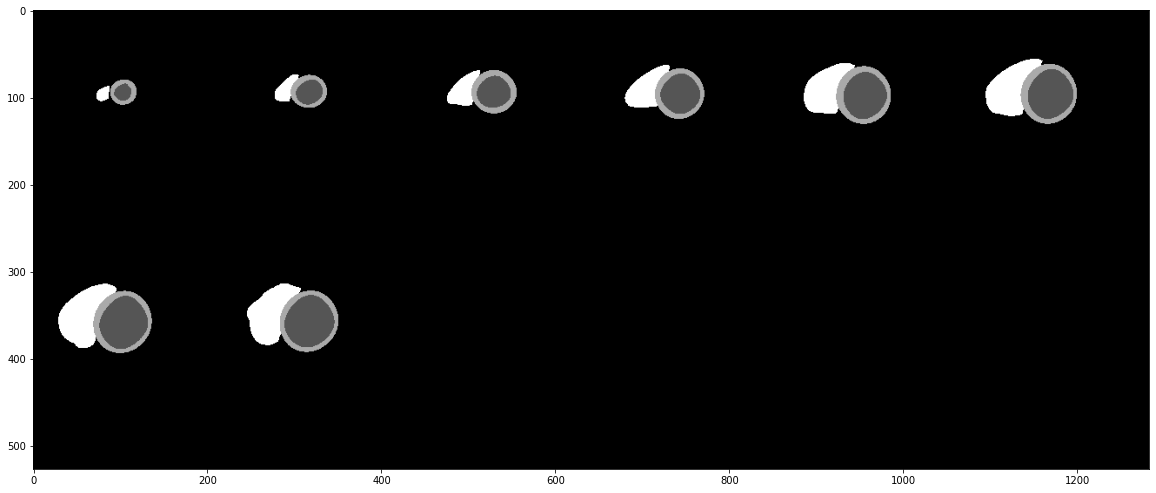

In [14]:
# grid_gt_out = grid_view(vox_gt_ed_data, layout=(2, 6), margin=5)
# print('grid out shape', grid_gt_out.shape)
# plt.imshow(grid_gt_out, cmap='gray')
# plt.show()
grid_gt_out = grid_view(vox_gt_es_data, layout=(2, 6), margin=5)
print('grid out shape', grid_gt_out.shape)
plt.imshow(grid_gt_out, cmap='gray')
plt.show()

In [15]:
one_hot_mask = one_hot(vox_gt_ed_data, num_classes=4)
print('one_hot mask shape', one_hot_mask.shape)
print('=========')
one_hot_grid = one_hot(grid_gt_out, num_classes=4)
print('one_hot mask shape', one_hot_grid.shape)

one_hot mask shape (4, 208, 256, 11)
one_hot mask shape (4, 527, 1283)


In [16]:
from vox.viz import mask_cover

grid_out = grid_view.grid_view(vox_ed_data, layout=(3, 4), margin=5)
print('grid out shape', grid_out.shape)
one_hot_grid = one_hot(grid_gt_out, num_classes=4)
print('one_hot mask shape', one_hot_grid.shape)

rgb = mask_cover.mask_cover(grid_out, one_hot_grid, show_class=1, is_one_hoted_mask=True)

print('rgb shape: ', rgb.shape)
plt.imshow(rgb.transpose((1, 2, 0)))
plt.show()

rgb = mask_cover.mask_cover(grid_out, one_hot_grid, show_class=2, is_one_hoted_mask=True, color=(0, 255, 0))
print('rgb shape: ', rgb.shape)
plt.imshow(rgb.transpose((1, 2, 0)))
plt.show()

rgb = mask_cover.mask_cover(grid_out, one_hot_grid, show_class=3, is_one_hoted_mask=True, color=(0, 0, 255))
print('rgb shape: ', rgb.shape)
plt.imshow(rgb.transpose((1, 2, 0)))
plt.show()

AttributeError: 'function' object has no attribute 'grid_view'

rgb shape:  (3, 788, 857)


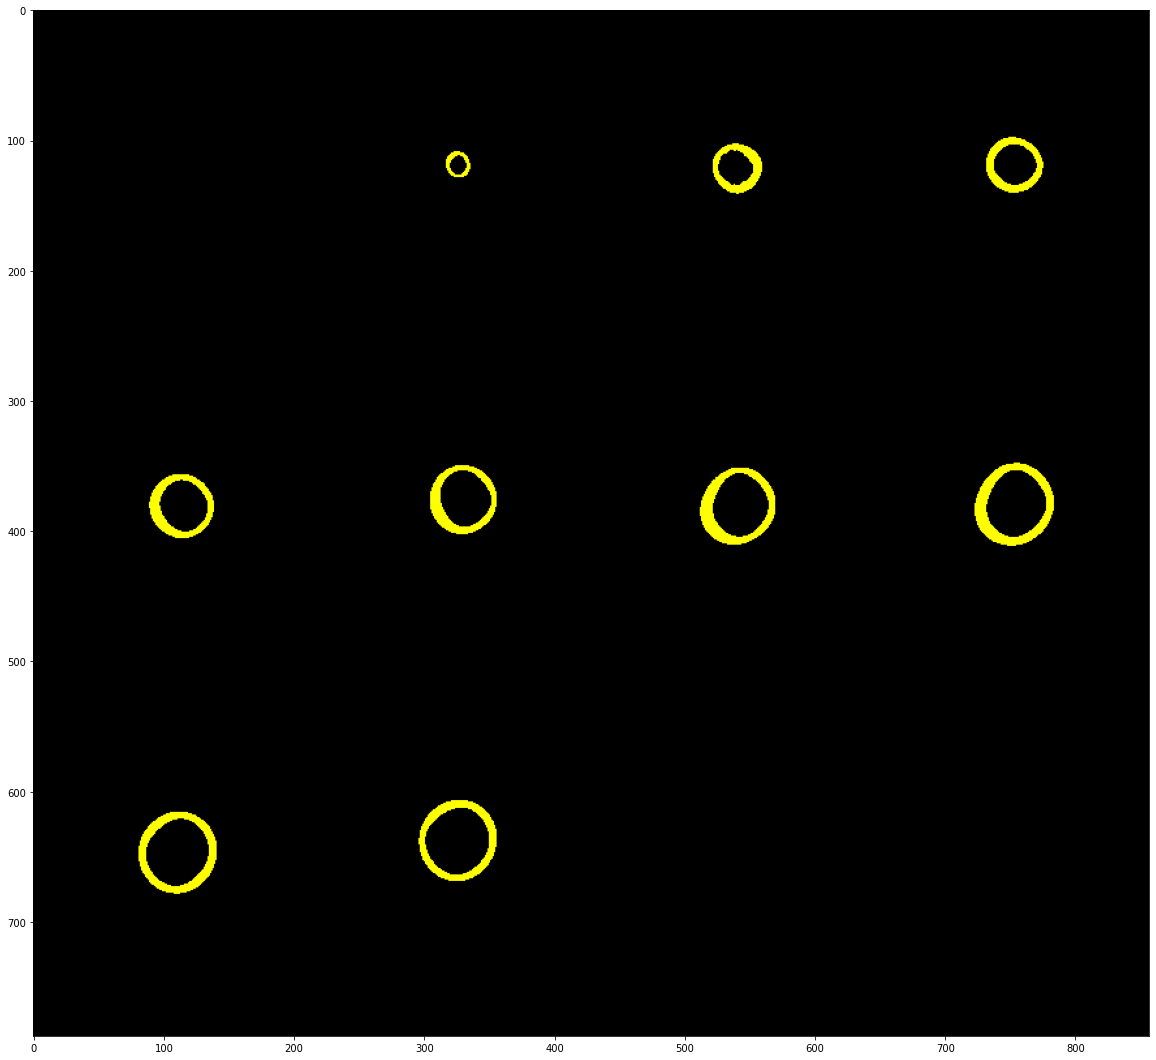

In [ ]:
from vox.viz import seg_mask

rgb = seg_mask.seg_mask_cmp(one_hot_grid, one_hot_grid, one_hoted=True, show_class=2)
print('rgb shape: ', rgb.shape)
plt.imshow(rgb.transpose((1, 2, 0)))
plt.show()

rgb shape:  (3, 788, 857)


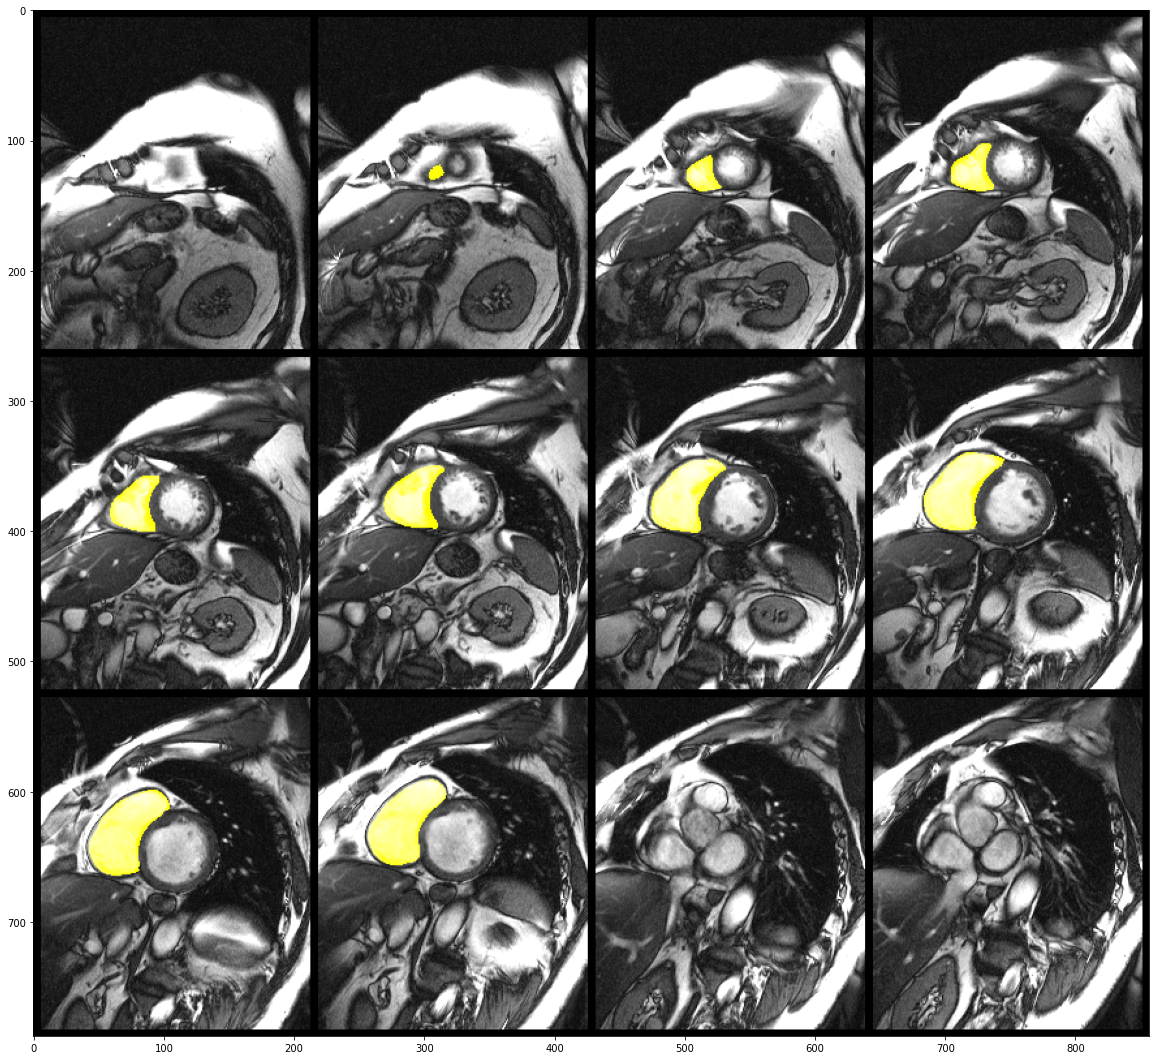

In [ ]:
rgb = mask_cover.cmp_cover(grid_out, one_hot_grid, one_hot_grid, show_class=3)
print('rgb shape: ', rgb.shape)
plt.imshow(rgb.transpose((1, 2, 0)))
plt.show()


rgb shape:  (3, 2304, 624)


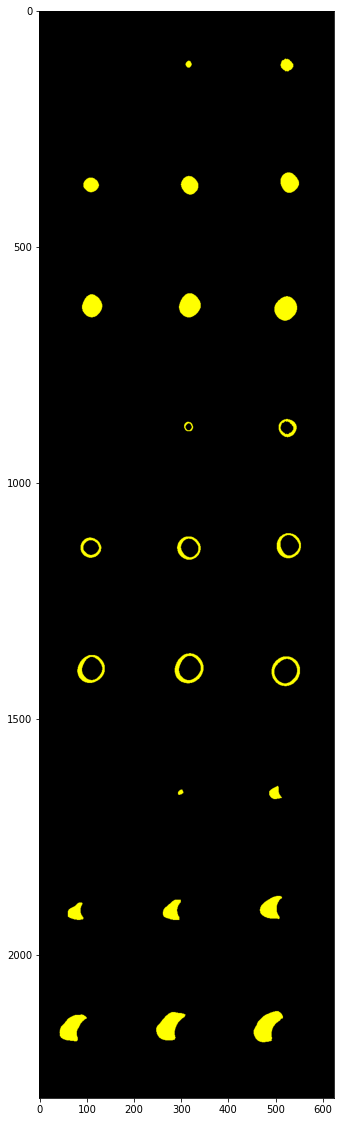

In [ ]:
from vox.viz import seg_mask

rgb = seg_mask.seg_mask_cmp_for_all_classes(one_hot_mask, one_hot_mask, layout=(3, 3))

print('rgb shape: ', rgb.shape)
plt.imshow(rgb.transpose((1, 2, 0)))
plt.show()

rgb shape:  (3, 768, 624)


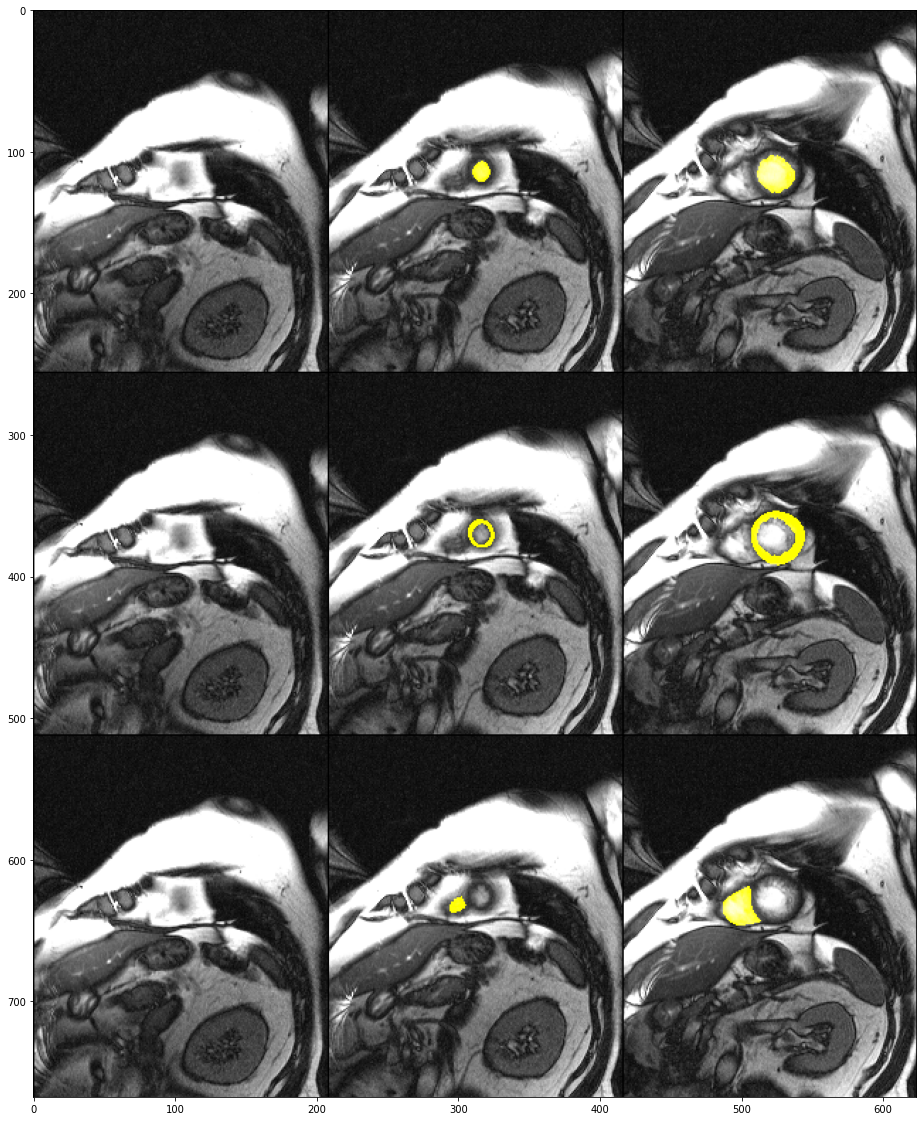

In [ ]:
from vox.viz import mask_cover

rgb = mask_cover.cmp_cover_for_all_classes(np.expand_dims(vox_ed_data, axis=0), one_hot_mask, one_hot_mask, layout=(1, 3))

print('rgb shape: ', rgb.shape)
plt.imshow(rgb.transpose((1, 2, 0)))
plt.show()